<a href="https://colab.research.google.com/github/selyraa/2141720005-machine-learning-2023/blob/main/JS11-Convolutional%20Neural%20Network%20(CNN)/tugas-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

In [10]:
# Load the MNIST dataset
mnist = fetch_openml("mnist_784", version=1)
mnist_data = mnist.data.astype(np.uint8).values.reshape((70000, 28, 28, 1)).astype('float32') / 255.0
mnist_labels = mnist.target.astype(np.uint8).values

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## Menerapkan PCA

In [20]:
# Reshape the data for PCA
mnist_data_reshaped = mnist_data.reshape((70000, 28 * 28))

# Perform PCA with 150 components
pca = PCA(n_components=150)
mnist_data_pca = pca.fit_transform(mnist_data_reshaped)

# Reshape the data back to its original form
mnist_data_pca = mnist_data_pca.reshape((70000, 1, 1, 150))

In [29]:
# Split the dataset into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(
    mnist_data_pca, mnist_labels, test_size=0.2, random_state=42
)
# Perbarui dimensi input sesuai dengan yang diharapkan oleh model
train_images = train_images.reshape((train_images.shape[0], 1, 1, 150))
test_images = test_images.reshape((test_images.shape[0], 1, 1, 150))

## Sample Images

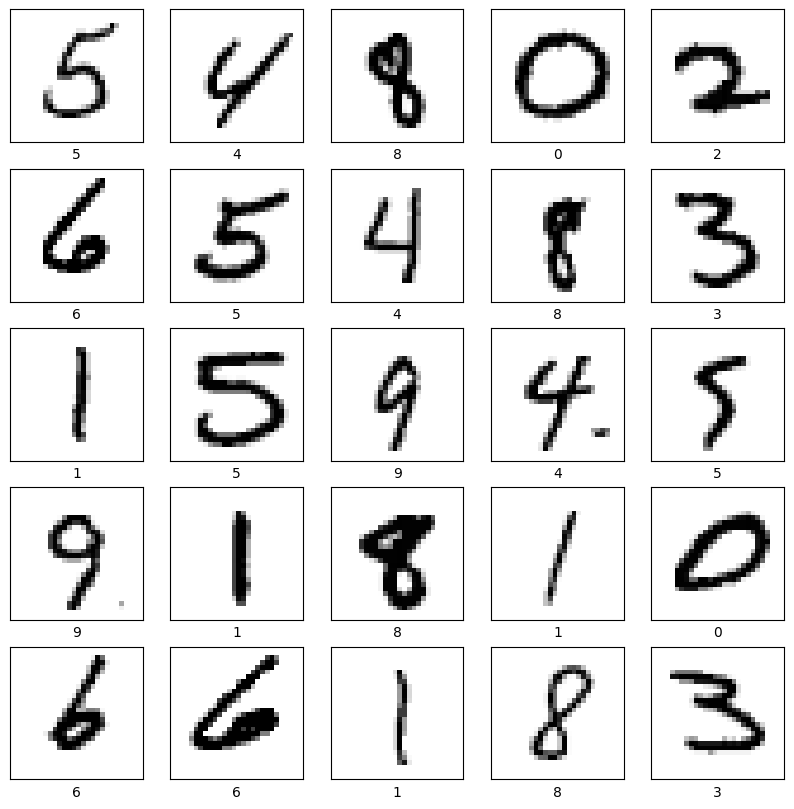

In [17]:
import matplotlib.pyplot as plt

# Define class names for MNIST (digits 0 to 9)
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Plot the first 25 images from the MNIST dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


## Tanpa Reduksi Dimensi

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Model definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))

In [13]:
# Model compilation
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [14]:
# Model training
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1750/1750 [==============================] - 96s 54ms/step - loss: 0.2720 - accuracy: 0.9172 - val_loss: 0.0711 - val_accuracy: 0.9771
Epoch 2/10
1750/1750 [==============================] - 88s 50ms/step - loss: 0.0830 - accuracy: 0.9742 - val_loss: 0.0498 - val_accuracy: 0.9844
Epoch 3/10
1750/1750 [==============================] - 95s 54ms/step - loss: 0.0556 - accuracy: 0.9831 - val_loss: 0.0477 - val_accuracy: 0.9845
Epoch 4/10
1750/1750 [==============================] - 88s 50ms/step - loss: 0.0428 - accuracy: 0.9868 - val_loss: 0.0369 - val_accuracy: 0.9879
Epoch 5/10
1750/1750 [==============================] - 89s 51ms/step - loss: 0.0347 - accuracy: 0.9891 - val_loss: 0.0311 - val_accuracy: 0.9894
Epoch 6/10
1750/1750 [==============================] - 93s 53ms/step - loss: 0.0284 - accuracy: 0.9912 - val_loss: 0.0328 - val_accuracy: 0.9894
Epoch 7/10
1750/1750 [==============================] - 89s 51ms/step - loss: 0.0236 - accuracy: 0.9921 - val_loss: 0.0315 -

438/438 - 9s - loss: 0.0313 - accuracy: 0.9907 - 9s/epoch - 21ms/step


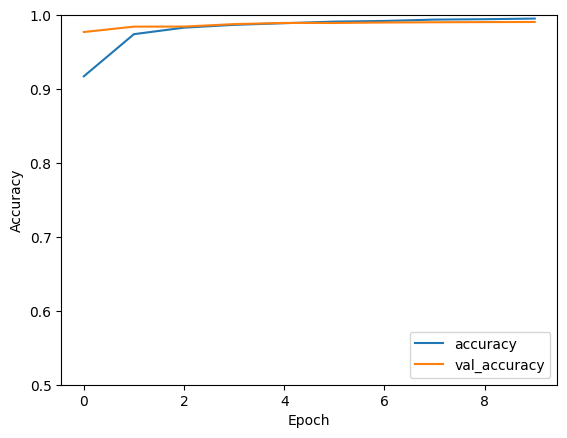

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [16]:
print("Akurasi: {:.2%}".format(test_acc))

Akurasi: 99.07%


## Reduksi Dimensi menggunakan PCA

In [45]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Clear session
tf.keras.backend.clear_session()

# Model definition
model = models.Sequential()

# Add Reshape layer to adjust dimensions before MaxPooling2D
model.add(layers.Reshape((1, 1, 150), input_shape=(1, 1, 150)))

model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((1, 1), padding='same'))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), padding='same'))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.GlobalAveragePooling2D())  # Use GlobalAveragePooling2D instead of Flatten

model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))

# Model compilation
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
# Model training
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1750/1750 [==============================] - 22s 11ms/step - loss: 1.6248 - accuracy: 0.5154 - val_loss: 0.5046 - val_accuracy: 0.8459
Epoch 2/10
1750/1750 [==============================] - 16s 9ms/step - loss: 0.5696 - accuracy: 0.8266 - val_loss: 0.2908 - val_accuracy: 0.9129
Epoch 3/10
1750/1750 [==============================] - 16s 9ms/step - loss: 0.3965 - accuracy: 0.8808 - val_loss: 0.2265 - val_accuracy: 0.9297
Epoch 4/10
1750/1750 [==============================] - 16s 9ms/step - loss: 0.3155 - accuracy: 0.9024 - val_loss: 0.1892 - val_accuracy: 0.9419
Epoch 5/10
1750/1750 [==============================] - 17s 10ms/step - loss: 0.2643 - accuracy: 0.9187 - val_loss: 0.1660 - val_accuracy: 0.9477
Epoch 6/10
1750/1750 [==============================] - 16s 9ms/step - loss: 0.2249 - accuracy: 0.9292 - val_loss: 0.1533 - val_accuracy: 0.9534
Epoch 7/10
1750/1750 [==============================] - 16s 9ms/step - loss: 0.2001 - accuracy: 0.9370 - val_loss: 0.1404 - val_

438/438 - 4s - loss: 0.1158 - accuracy: 0.9631 - 4s/epoch - 8ms/step


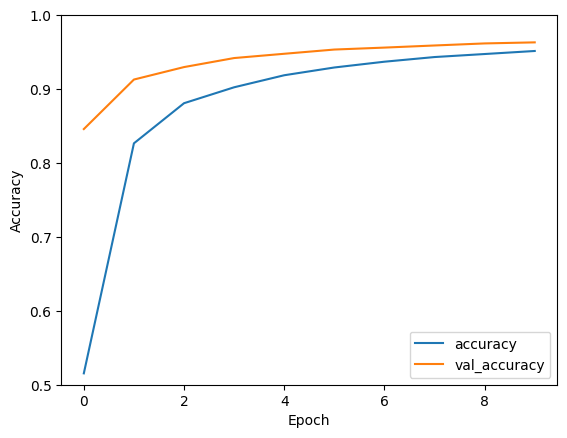

In [46]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [47]:
print("Akurasi: {:.2%}".format(test_acc))

Akurasi: 96.31%


## Kesimpulan

1. Model Tanpa PCA:

- Akurasi: Model tanpa PCA memiliki akurasi yang lebih tinggi (99%).
- Arsitektur: Model ini menggunakan arsitektur yang lebih kompleks dengan lebih banyak lapisan konvolusi dan menggunakan Flatten untuk meratakan data.
- Efektivitas: Model ini lebih efektif dalam memanfaatkan informasi dari gambar-gambar MNIST.

2. Model Dengan PCA:

- Akurasi: Model dengan PCA memiliki akurasi yang lebih rendah (96%).
- Arsitektur: Model ini menggunakan lapisan GlobalAveragePooling2D setelah lapisan konvolusi, dan menggunakan reduksi dimensi PCA sebelumnya.
- Efektivitas: Reduksi dimensi PCA dapat membantu mengurangi dimensi data, namun pada dataset MNIST ini, model ini tidak mencapai akurasi sebaik model tanpa PCA.

Jadi, pada kasus ini reduksi dimensi PCA mungkin tidak memberikan representasi yang optimal untuk dataset MNIST. Reduksi dimensi PCA pada dasarnya mencoba untuk merepresentasikan data dengan fitur-fitur yang lebih sedikit namun masih dapat menjelaskan variasi yang signifikan. Namun, pada dataset MNIST, setelah dilakukan reduksi dimensi, mungkin beberapa informasi penting hilang, yang dapat mempengaruhi kemampuan model untuk memahami pola yang kompleks dalam gambar-gambar digit.Hilangnya informasi ini dapat mengakibatkan model tidak dapat membedakan antara digit dengan baik, sehingga akurasi menurun. Sedangkan Model tanpa PCA memiliki arsitektur yang lebih kompleks dengan lebih banyak lapisan konvolusi. Ini memberikan model lebih banyak kapasitas untuk menangkap fitur-fitur dan pola yang mungkin penting dalam gambar-gambar MNIST. Flatten juga memungkinkan model mempertahankan informasi spasial dari gambar.